### _Pereceptron Learning with Linearly Seperable Data_

In [1]:
# Importing Libraries

using Plots
using LinearAlgebra

In [2]:
# Importing Data

X = [[1,2], [2,5], [6,7],[8,5]]
Y = [0, 0, 1, 1]

N = length(X)         # Number of datapoints
n = length(X[1])      # Dimension of a datapoint

2

In [3]:
# Data Pre-processing

class_0 = []          # Class 0 points
class_1 = []          # Class 1 points

for i in 1:N
   if Y[i] == 0
        push!(class_0, X[i])
    else
        push!(class_1, X[i])
    end
end

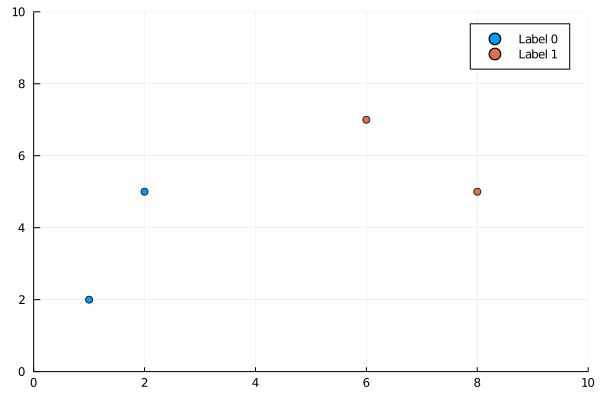

In [4]:
# Plotting

scatter(first.(class_0), last.(class_0), xlim=(0,10), ylim=(0,10), label="Label 0")
scatter!(first.(class_1), last.(class_1), label="Label 1")

In [5]:
# Perceptron Learning Algorithm

w = [rand() for _ in 1:n+1]               # Initial w vector
# println(w)

converged = false

while !converged
    
   converged = true
    
    for _x in class_0
        x = copy(_x)
        append!(x, 1)
        
        if dot(w, x) >= 0
            w = w - x 
            converged = false
            break
        end
    end
    
    if converged
        for _x in class_1
            x = copy(_x)
            append!(x, 1)
            if dot(w, x) < 0
                w = w + x
                converged = false
                break
            end
        end
    end
    
end


println(w)

[4.651860861781085, -2.0292998308842485, -4.639015502378657]


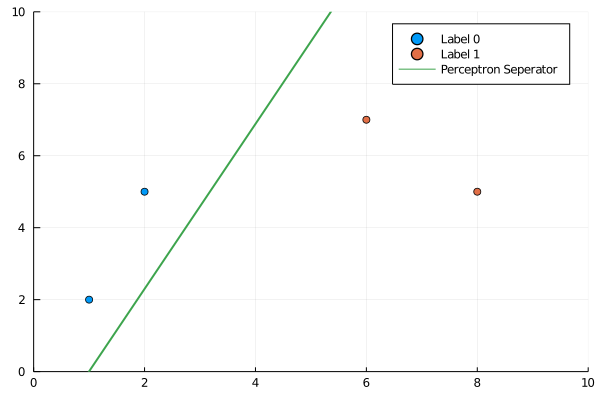

In [6]:
# Plotting

scatter(first.(class_0), last.(class_0), xlim=(0,10), ylim=(0,10), label="Label 0")
scatter!(first.(class_1), last.(class_1), label="Label 1")
plot!(x -> x, x -> -(w[1]x + w[3]) / w[2], 0, 10, label="Perceptron Seperator", line=:2)

In [7]:
# Predicting classes of testpoints

T = [[1,2], [3,5], [7,8]]

class_0_test = []
class_1_test = []

for _x in T
    x = copy(_x)
    append!(x, 1)
    
    if dot(w, x) >= 0
        push!(class_1_test, _x)
    else
        push!(class_0_test, _x)
    end
end

println(class_0_test)
println(class_1_test)

Any[[1, 2], [3, 5]]
Any[[7, 8]]


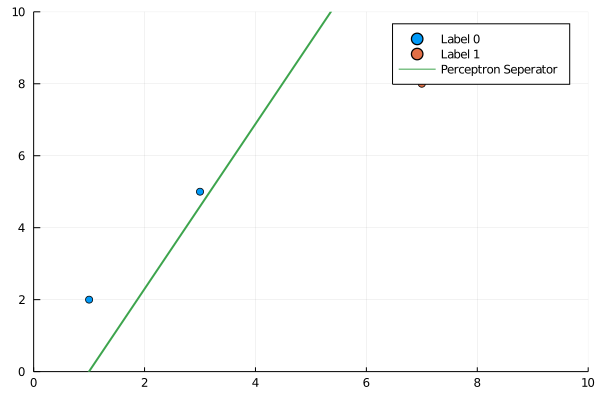

In [8]:
# Plotting testpoints

scatter(first.(class_0_test), last.(class_0_test), xlim=(0,10), ylim=(0,10), label="Label 0")
scatter!(first.(class_1_test), last.(class_1_test), label="Label 1")
plot!(x -> x, x -> -(w[1]x + w[3]) / w[2], 0, 10, label="Perceptron Seperator", line=:2)